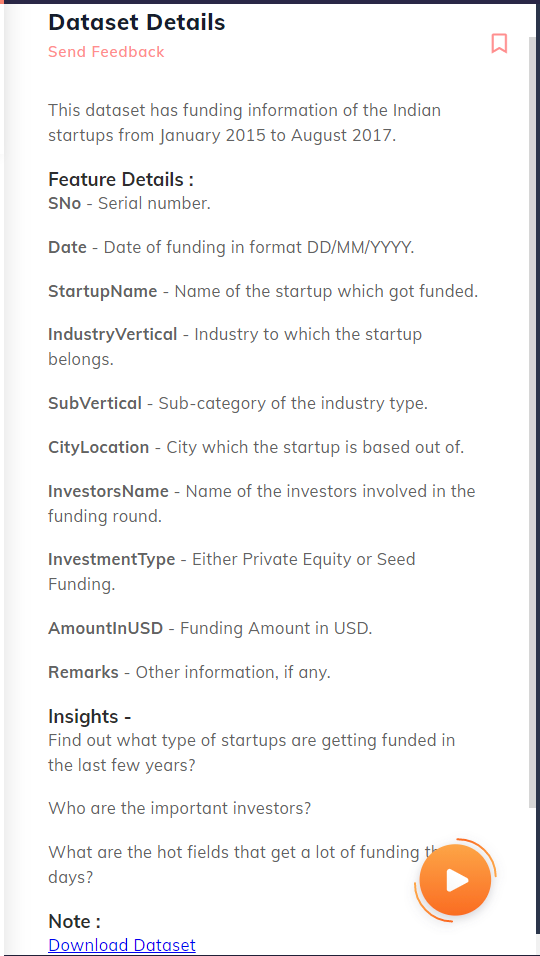

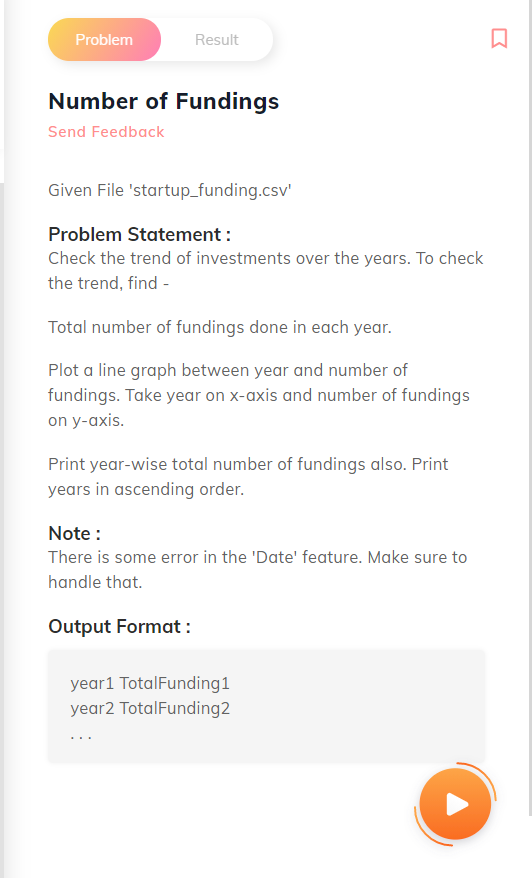

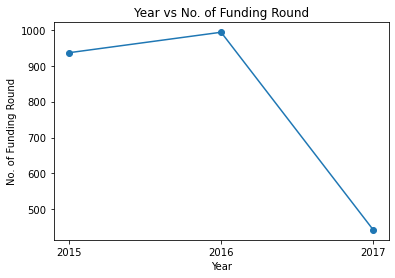

2015 936
2016 993
2017 443


In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df_start=pd.read_csv('Datasets/startup_funding.csv',encoding='utf-8')
df_start['Date'].replace("12/05.2015","12/05/2015",inplace=True)
df_start['Date'].replace("13/04.2015","13/04/2015",inplace=True)
df_start['Date'].replace("15/01.2015","15/01/2015",inplace=True)
df_start['Date'].replace("22/01//2015","22/01/2015",inplace=True)
def convertDate(date):
    return date.split('/')[-1]
df_start['Year']=df_start['Date'].apply(convertDate)
year_count=df_start['Year'].value_counts()
year_fund=list(zip(year_count.index,year_count.values))
year_fund=np.array(year_fund,dtype=int)
year_fund=year_fund[year_fund[:,0].argsort()]
year=year_fund[:,0]
funding_round=year_fund[:,1]
plt.plot(year,funding_round,marker = 'o')
plt.xticks(year)
plt.title('Year vs No. of Funding Round')
plt.xlabel('Year')
plt.ylabel('No. of Funding Round')
plt.show()
for i in range(len(year)):
    print(year[i],funding_round[i])

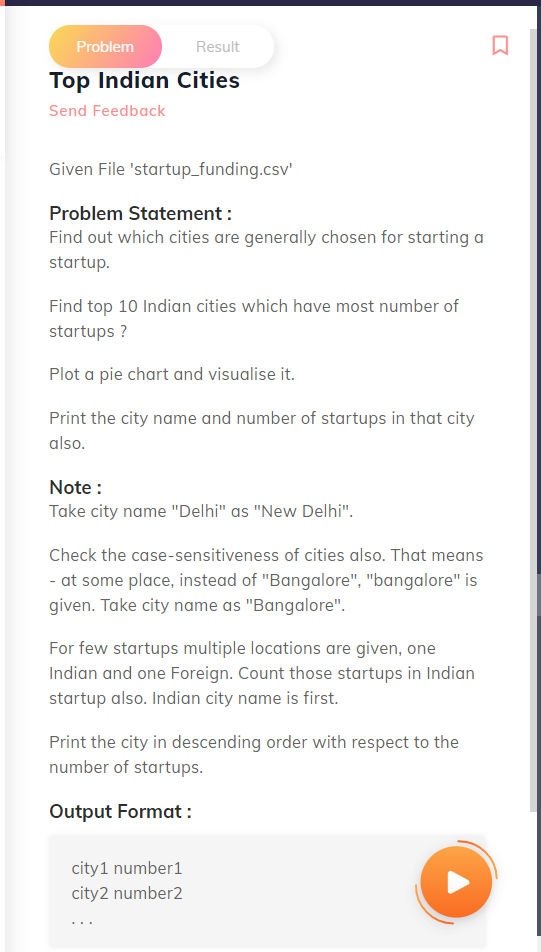

In [9]:
import pandas as pd
import numpy as np
df_start=pd.read_csv('Datasets/startup_funding.csv',encoding='utf-8')
df_start['CityLocation'].dropna(inplace=True)
def separateCity(city):
    return city.split('/')[0].strip()
df_start['CityLocation']=df_start['CityLocation'].apply(separateCity)
df_start['CityLocation'].replace("Delhi","New Delhi",inplace=True)
df_start['CityLocation'].replace("bangalore","Bangalore",inplace=True)
city_number=df_start['CityLocation'].value_counts()[0:10]
city=city_number.index
numCity=city_number.values
for i in range(len(city)):
    print(city[i],numCity[i])

AttributeError: 'float' object has no attribute 'split'

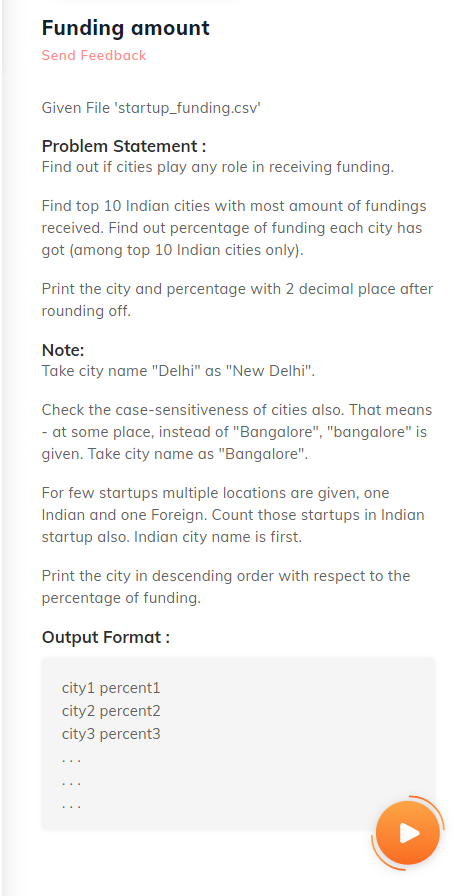

In [2]:
import pandas as pd
import numpy as np

df_start=pd.read_csv('Datasets/startup_funding.csv',encoding='utf-8')
df_start['CityLocation'].dropna(inplace=True)
def separateCity(city):
    return city.split('/')[0]
df_start['CityLocation']=df_start['CityLocation'].apply(separateCity)
df_start['CityLocation'].replace("Delhi","New Delhi",inplace=True)
df_start['CityLocation'].replace("bangalore","Bangalore",inplace = True)
## Converting "AmountInUSD" into numeric format
df_start["AmountInUSD"] = df_start["AmountInUSD"].apply(lambda x: float(str(x).replace(",", "")))
df_start["AmountInUSD"] = pd.to_numeric(df_start["AmountInUSD"])
city_amount=df_start.groupby('CityLocation')['AmountInUSD'].sum().sort_values(ascending = False)[0:10]
city=city_amount.index
amountCity=city_amount.values
perAmount=np.true_divide(amountCity, amountCity.sum())*100
for i in range(len(city)):
 print(city[i],format(perAmount[i],'.2f'))

AttributeError: 'float' object has no attribute 'split'

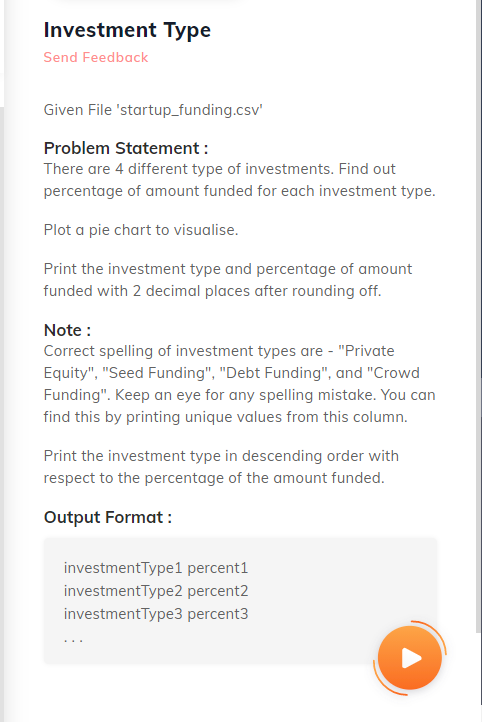

In [3]:
import pandas as pd
import numpy as np
df_start=pd.read_csv('Datasets/startup_funding.csv',encoding='utf-8')
## Correcting the InvestmentType
df_start['InvestmentType'].replace('SeedFunding','Seed Funding',inplace=True)
df_start['InvestmentType'].replace('PrivateEquity','Private Equity',inplace=True)
df_start['InvestmentType'].replace('Crowd funding','Crowd Funding',inplace=True)
## Converting "AmountInUSD" into numeric format
df_start["AmountInUSD"] = df_start["AmountInUSD"].apply(lambda x:float(str(x).replace(",","")))
df_start["AmountInUSD"] = pd.to_numeric(df_start["AmountInUSD"])
invest_amount=df_start.groupby('InvestmentType')['AmountInUSD'].sum().sort_values(ascending=False)
invest=invest_amount.index
amountInvest=invest_amount.values
peramount=np.true_divide(amountInvest, sum(amountInvest))*100
for i in range(len(invest)):
    print(invest[i],format(peramount[i],'.2f'))

Private Equity 98.15
Seed Funding 1.81
Debt Funding 0.04
Crowd Funding 0.00


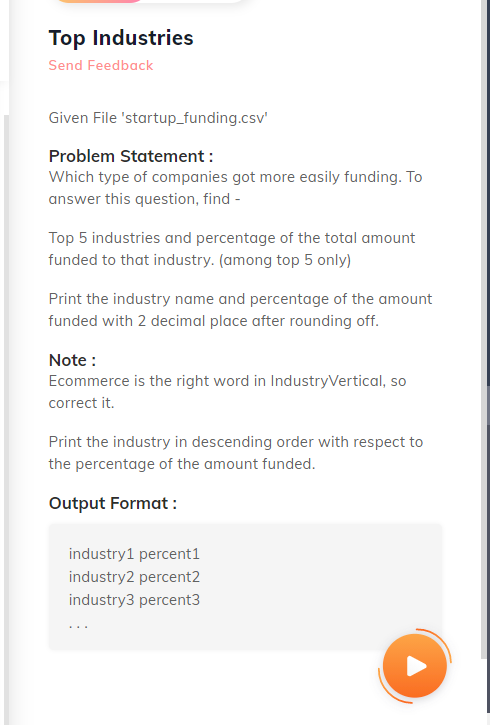

In [13]:
#Which type of companies got more easily funding. To answer this question, find -
#Top 5 industries and percentage of the total amount funded to that industry. (among top 5 only)
#Print the industry name and percentage of the amount funded with 2 decimal place after rounding off.

#There are 4 different type of investments. Find out percentage of amount funded for each investment type.
#Plot a pie chart to visualise.
#Print the investment type and percentage of amount funded with 2 decimal places after rounding off.
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
data=pd.read_csv("Datasets/startup_funding.csv") 
df=data.copy() 
df.loc[df.IndustryVertical=='eCommerce', 'IndustryVertical']='Ecommerce'
df.loc[df.IndustryVertical=='ECommerce', 'IndustryVertical']='Ecommerce'
df.loc[df.IndustryVertical=='ecommerce', 'IndustryVertical']='Ecommerce'

df.AmountInUSD.loc[df["AmountInUSD"].isnull()]="0"
df["IndustryVertical"].value_counts()
industryVertical=[]
amount=[]

for i in df.IndustryVertical:
    industryVertical.append(i)
for i in df.AmountInUSD:
    amount.append(i)

for i in range(len(amount)):
    amount[i]=''.join(amount[i].split(","))


np_amount=np.array(amount, dtype='int64')
npIndustryVertical=np.array(industryVertical)

dic=dict()
for i in range(len(npIndustryVertical)):
    if npIndustryVertical[i] in dic:
        dic[npIndustryVertical[i]]+=np_amount[i]
    else:
        dic[npIndustryVertical[i]]=np_amount[i]
del dic['nan']


xaxis=list(dic.keys())
yaxis=list(dic.values())

np_xaxis=np.array(xaxis)
np_yaxis=np.array(yaxis)


np_xaxis=np_xaxis[np.argsort(np_yaxis)]
np_yaxis=np.sort(np_yaxis)

np_xaxis=np_xaxis[len(np_xaxis)-1:len(np_xaxis)-1-5:-1]
np_yaxis=np_yaxis[len(np_yaxis)-1:len(np_yaxis)-1-5:-1]

#for i in range(len(np_xaxis)):
#    print(np_xaxis[i]," ",np_yaxis[i])

for i in range(len(np_xaxis)):
    print(np_xaxis[i],' ', format((np_yaxis[i]*100)/sum(np_yaxis), '.2f'))

Ecommerce   40.53
Consumer Internet   35.95
Technology   10.45
Online Marketplace   6.63
E-Commerce & M-Commerce platform   6.44


C:\Users\DELL\anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


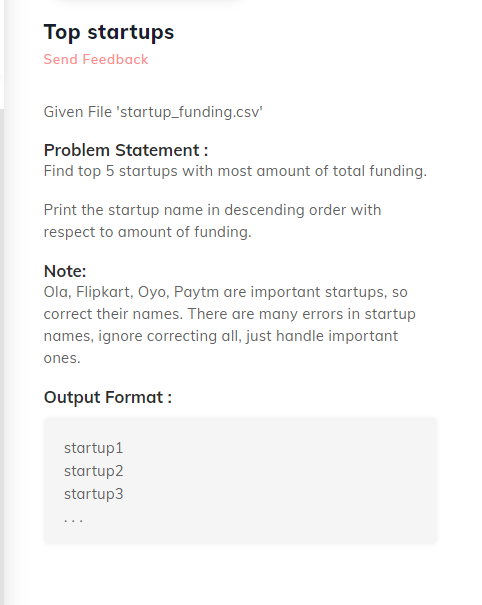

In [14]:
import pandas as pd
import numpy as np
df_start=pd.read_csv('Datasets/startup_funding.csv',encoding='utf-8')
df_start['StartupName'].replace('Olacabs','Ola',inplace=True)
df_start['StartupName'].replace('Ola Cabs','Ola',inplace=True)
df_start['StartupName'].replace('Flipkart.com','Flipkart',inplace=True)
df_start['StartupName'].replace('Paytm Marketplace','Paytm',inplace=True)
df_start['StartupName'].replace('Oyo Rooms','Oyo',inplace=True)
df_start['StartupName'].replace('Oyorooms','Oyo',inplace=True)
df_start['StartupName'].replace('OyoRooms','Oyo',inplace=True)
df_start['StartupName'].replace('OYO Rooms','Oyo',inplace=True)
## Converting "AmountInUSD" into numeric format
df_start["AmountInUSD"] = df_start["AmountInUSD"].apply(lambda x:
float(str(x).replace(",","")))
df_start["AmountInUSD"] = pd.to_numeric(df_start["AmountInUSD"])
start_fund=df_start.groupby('StartupName')['AmountInUSD'].sum().sort_values(ascending=False)[0:5]
startup=start_fund.index
for i in startup:
    print(i)

Paytm
Flipkart
Ola
Snapdeal
Oyo


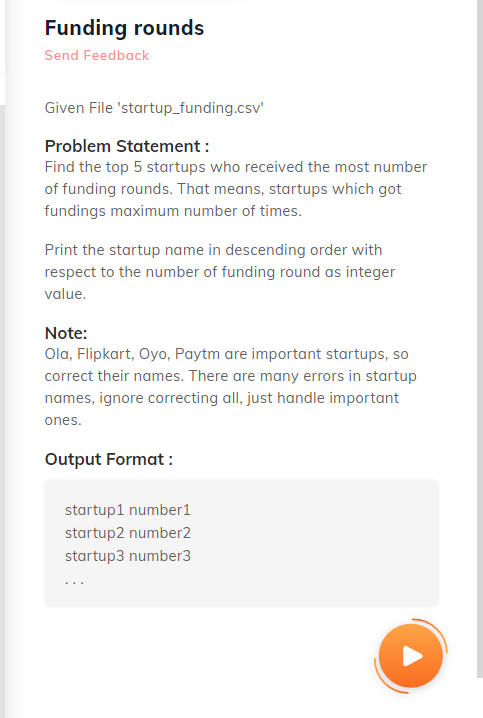

In [15]:
import pandas as pd
df_start=pd.read_csv('Datasets/startup_funding.csv',encoding='utf-8')
df_start['StartupName'].replace('Olacabs','Ola',inplace=True)
df_start['StartupName'].replace('Ola Cabs','Ola',inplace=True)
df_start['StartupName'].replace('Flipkart.com','Flipkart',inplace=True)
df_start['StartupName'].replace('Paytm Marketplace','Paytm',inplace=True)
df_start['StartupName'].replace('Oyo Rooms','Oyo',inplace=True)
df_start['StartupName'].replace('Oyorooms','Oyo',inplace=True)
df_start['StartupName'].replace('OyoRooms','Oyo',inplace=True)
df_start['StartupName'].replace('OYO Rooms','Oyo',inplace=True)
start_round=df_start['StartupName'].value_counts()[0:5]
startup=start_round.index
fundround=start_round.values
for i in range(len(startup)):
    print(startup[i],fundround[i])

Ola 9
Swiggy 7
Paytm 6
UrbanClap 6
Oyo 6


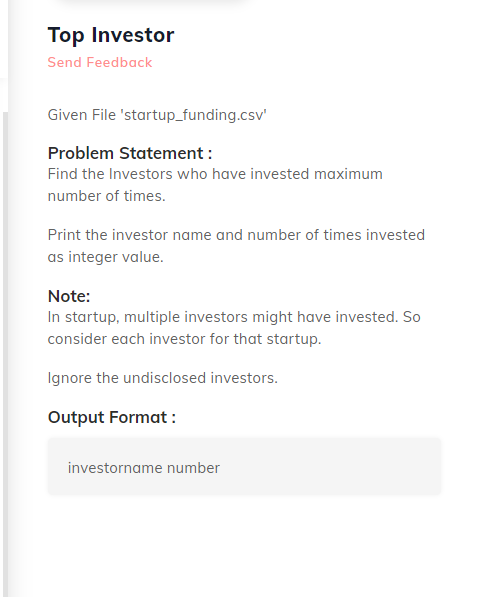

In [16]:
import pandas as pd
import numpy as np
df_start=pd.read_csv('Datasets/startup_funding.csv',encoding='utf-8')
df_start['InvestorsName'].dropna(inplace=True)
def createDictionary(array):
    dictionary={}
    for i in array:
        if ',' not in i:
            if i in dictionary:
                dictionary[i]=dictionary.get(i)+1
            else:
                dictionary[i]=1
        else:
            string=i.strip().split(',')
            for j in string:
                if j.strip() in dictionary:
                    dictionary[j.strip()]=dictionary.get(j.strip())+1
                else:
                    dictionary[j.strip()]=1
    return dictionary
dictionary=createDictionary(df_start['InvestorsName'])
dataf=pd.DataFrame(list(dictionary.values()),list(dictionary.keys()))
dataf=dataf.sort_values(by=[0],ascending=False)
print(dataf.index[0],dataf.values[0][0])

TypeError: argument of type 'float' is not iterable